<a href="https://colab.research.google.com/github/akalpit23/Explainable-techniques/blob/main/Assignment_10/Explainable_Techniques_Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #10



## Akalpit Dawkhar

### **Human-AI Interaction**

In [ ]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "Explainable-techniques/Assignment-5/" # Change to your repo name
git_path = 'https://github.com/akalpit23/Explainable-techniques.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file'
!pip install -q -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'Assignment-5/'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

Cloning into 'Explainable-techniques'...
remote: Enumerating objects: 296, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 296 (delta 45), reused 31 (delta 12), pack-reused 199 (from 1)
Receiving objects: 100% (296/296), 9.86 MiB | 26.71 MiB/s, done.
Resolving deltas: 100% (146/146), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.3/427.3 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 34.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
from alibi.explainers import AnchorImage


#Step 1: Download the Sample Image

In [ ]:
# We use a sample image from ImageNet for demonstration purposes.
!wget https://raw.githubusercontent.com/EliSchwartz/imagenet-sample-images/master/n01532829_house_finch.JPEG -O /content/sample_image.jpg


--2024-11-14 05:42:16--  https://raw.githubusercontent.com/EliSchwartz/imagenet-sample-images/master/n01532829_house_finch.JPEG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78014 (76K) [image/jpeg]
Saving to: ‘/content/sample_image.jpg’

/content/sample_ima 100%[===================>]  76.19K  --.-KB/s    in 0.004s  

2024-11-14 05:42:16 (17.4 MB/s) - ‘/content/sample_image.jpg’ saved [78014/78014]



#Step 2: Load Pre-trained Model

**Model Selection and Preprocessing**:
   - We use a pre-trained ResNet34 model, which has been trained on millions of images to recognize various objects. This model helps us make complex decisions based on visual data, which can be invaluable in identifying objects and extracting insights from image data.
   - The preprocessing steps (resizing, cropping, and normalization) are crucial to ensure that the input matches the format and scale that the model expects, leading to accurate predictions. This ensures that any differences between training and input images do not negatively impact model performance, which is critical for operational consistency.


In [ ]:
# Load the pre-trained ResNet34 model from torchvision. This model has been trained on the ImageNet dataset, making it capable of recognizing a wide variety of objects.
model = models.resnet34(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 96.5MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

#Step 3: Preprocess the Input Image

In [ ]:
# Define image preprocessing steps including resizing, cropping, and normalizing the image so that it matches the input requirements of the ResNet34 model.
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# Load and preprocess the image
image_path = "sample_image.jpg"
image = Image.open(image_path).convert('RGB')
input_tensor = preprocess(image).unsqueeze(0)

In [ ]:
# Display the shape of the input tensor to confirm preprocessing was successful
input_tensor.shape

torch.Size([1, 3, 224, 224])

#Step 4: Make a Prediction

In [ ]:
# Use the model to make a prediction on the preprocessed image. The output tensor contains class scores, from which we determine the predicted class.
output = model(input_tensor)
_, pred_class = torch.max(output, 1)

#Step 5: Define Image Transform for Anchor Explainer

**Anchor-based Explanation**:
   - The AnchorImage explainer provides insights into the specific parts of an image that most influence the model's prediction. This is similar to how a human might identify a bird by focusing on its feathers or beak.
   - The concept of "anchors" is key here. These anchors are interpretable parts of the image that, if altered, would significantly change the prediction. By identifying these regions, we gain a better understanding of what drives the model's decision-making.
   - For instance, if the model classifies an image as a bird, the anchor may represent the beak or wings, which are important features that lead the model to that conclusion.


In [ ]:
# Define an additional transform to ensure the image size matches the AnchorImage explainer requirements.
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to 224x224 pixels
    transforms.ToTensor(),  # Convert the image to PyTorch Tensor data type
])

# Load and transform the image for anchor explanation
pil_image = Image.open(image_path).convert("RGB")  # Load and convert image to RGB
image_tensor = transform(pil_image).unsqueeze(0)

#Step 6: Define Prediction Function for AnchorImage

In [ ]:
# The prediction function takes in a batch of images, preprocesses them, and runs them through the model to get predictions.
def predict_anchor(images):
    """
    Predicts the class probabilities for a batch of images.

    Args:
        images (list of numpy arrays): A batch of images to be processed.

    Returns:
        numpy.ndarray: Predicted class probabilities for each image in the batch.

    This function preprocesses each image using the same steps applied to the original input image,
    ensuring consistency. The batch of images is then passed through the pre-trained model to obtain
    predictions, which are returned as numpy arrays. This allows the explainer to effectively use the model
    to determine how each part of the image influences the prediction.
    """
    batch = torch.stack([preprocess(Image.fromarray(img.astype(np.uint8))) for img in images])
    output = model(batch)
    return output.detach().numpy()  # Convert PyTorch tensor to numpy array

#Step 7: Initialize the AnchorImage Explainer

**Segmentation and Anchors**:
   - We use a segmentation technique called SLIC (Simple Linear Iterative Clustering) to break down the image into meaningful regions or superpixels. These superpixels make it easier to understand the model's focus areas by visually separating the important segments.
   - The explainer uses these segments to determine which parts of the image are most important for the decision, thereby providing transparency. This transparency helps us understand not only what decision the model made but why it made that decision.
   - Superpixel segmentation makes the explanation more human-readable by isolating regions that contain distinguishing features, rather than working with individual pixels, which are harder to interpret.


In [ ]:
# AnchorImage uses segmentation techniques to create interpretable regions that contribute to the model's prediction.
# We use the SLIC segmentation algorithm with specified parameters to initialize the explainer.
segmentation_fn = 'slic'
kwargs = {'n_segments': 10, 'compactness': 20, 'sigma': .6}  # Adjust segmentation parameters as needed
explainer = AnchorImage(predict_anchor, image_shape=(224, 224, 3), segmentation_fn=segmentation_fn,
                        segmentation_kwargs=kwargs)


#Step 8: Generate an Explanation for the Input Image

In [ ]:
# Explain the prediction for the input image by providing the image as a numpy array to the explainer.
np_image = np.array(pil_image)
explanation = explainer.explain(np_image, threshold=0.95)

#Step 9: Visualize the Anchor
 **Confidence in Anchors**:
   - The confidence score, shown in the anchor visualization, indicates how certain the model is that the identified region (anchor) supports its prediction. For instance, if the model predicts that an image is of a bird, the anchor with a high confidence score represents the visual parts that are most indicative of a bird.
   - This confidence score is crucial for evaluating the reliability of the model's prediction. In safety-critical applications, such as autonomous driving, it is important to ensure that high-confidence anchors are responsible for decisions to trust the model's output.
   - This confidence metric also assists in regulatory compliance, allowing auditors or stakeholders to verify that the model’s decision-making process adheres to expected guidelines and principles.


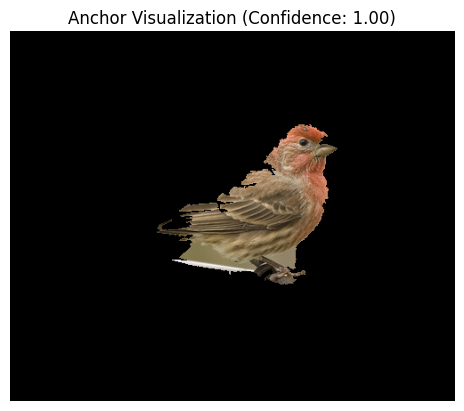

In [ ]:
# The anchor represents the region of the image that was crucial for the model's decision.
# The confidence score indicates how well this anchor represents the model's prediction.
plt.imshow(explanation.anchor)
plt.title(f"Anchor Visualization (Confidence: {explanation.precision:.2f})")
plt.axis('off')  # Turn off axis
plt.show()

#Step 10: Visualize the Superpixels

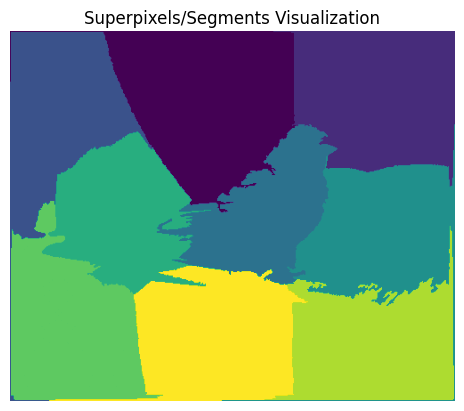

In [ ]:
# The superpixels represent segments of the image used by the explainer to determine regions of interest.
plt.imshow(explanation.segments)
plt.title("Superpixels/Segments Visualization")
plt.axis('off')  # Turn off axis
plt.show()


**Application**:
   - These types of explanations are crucial for areas where trust and interpretability are key, such as healthcare, finance, and autonomous driving. Understanding what drives a model's decision allows stakeholders to verify the decision-making process, ensuring alignment with regulatory and ethical standards.
   - For instance, in healthcare, understanding which features of an X-ray image led to a diagnosis can help doctors validate the AI's decision. In finance, understanding the factors behind a credit score decision can ensure fairness and address regulatory scrutiny.
   - By visualizing these anchors, stakeholders can verify whether the AI system is making decisions based on appropriate and ethical criteria. This helps in improving trust in the technology and ensuring responsible use.

The process described here enhances transparency, builds trust, and ensures that AI systems provide understandable and actionable insights. It also ensures that stakeholders—from developers to end-users—are well informed about the internal workings of the AI, promoting adoption and ethical usage of AI technologies.